# Clausen Folded Low Pass Filters

<img src="./Observations/Filtered Image.png">

## Abstract: 

Filter Design is an important procedure of Image Processing to present new digital filters which can challenge the current state of the art filters with improved performance and results. This paper is a comprehensive, intuitive and novel approach of designing Custom Folded Clausen based low pass filters inspired from the architecture of a standard Gaussian Gabor Filter which can be applied on images for noise removal, smoothening or blurring the image, low-level abstract detection of spatial orientated edges and low-level segmentation; and can be modified to improve performance or modulate its use.

## In-Depth: 

Clausen Folded Low Pass Filters are a set of customizable low pass Image filters constructed from 2 fundamental kernels - A Clausen Kernel and a Folded Normal Kernel. Their Formulas are provided below: 

Folded Normal Kernel Mathematical Formula: 
$\sqrt{\frac{2}{\pi \sigma^2}}{e}^{\frac{-(x^2+\mu^2)}{2\sigma^2}}cosh(\frac{\mu x}{\sigma^2})$

1st Order Standard Clausen Function:
$-ln|2sin(\frac{x}{2})|$

2nd Order Glaisher SL-type Clausen Function:
$\frac{\pi^2}{6}-\frac{\pi x}{2}+\frac{x^2}{4}$

Filter Specifications: 

|  Filter Psuedo Name  |  Type of Clausen Function  |  Mean Value for Folded Normal Kernel  |  Standard Deviation Value for Folded Normal Kernel  |
| :----: | :----: | :----: | :----: |
|Filter Y|1st Order Standard Clausen Function|0|1|
|Filter X|2nd Order Glaisher (SL-type) Clausen Function|0|1|
|Filter XI|2nd Order Glaisher (SL-type) Clausen Function|1|1|
|Filter XII|2nd Order Glaisher (SL-type) Clausen Function|0.5|1.5|
|Filter XIII|2nd Order Glaisher (SL-type) Clausen Function|0.5|2|
|Filter XIV|2nd Order Glaisher (SL-type) Clausen Function|2|1|
|Filter XV|2nd Order Glaisher (SL-type) Clausen Function|0|0.5|

## Computational Run Time Comparison (in seconds) : 

|Filter Name| Run Time (Resolution - 512x512)|Run Time (Resolution - 512x512)|
|---|---|---|
|GABOR| 0.7231871 |4.742698799999971| 
|FILTER Y|0.31141730000000223|4.7652437000001555|
|FILTER X| 0.721678| 4.695399900000211 |
|FILTER XI| 0.31112860000001774| 4.724164799999926 |
|FILTER XII| 0.3133619999999837| 4.69758690000026 |
|FILTER XIII| 0.2977893999999992| 4.775738300000057 |
|FILTER XIV| 0.3143409999998994 |4.790427799999861 |
|FILTER XV| 0.31068419999996677 |4.756758600000012 |

## Results:

Clausen Folded Low Pass filters can be used with varying parameters for various Image Processing Tasks like smoothening, blurring, noise reduction, abstract edge preservation, etc. Here, all of the Clausen Folded Image Filters are applied on a standard input image. 

<img src="./Observations/allX.png" style="width: 700px;">

Filter XII acts as an efficient Image Blurring Filter as seen below: 

<img src="./Observations/zoom.png" style="width: 700px;">


### Code Walkthrough:

This code is for reproducing Filter X. Please configure parameters to generate results for other custom clausen folded filters.

In [0]:
# Import TensorFlow and Enable Eager Execution
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.enable_eager_execution()

In [0]:
# Import Necessary Modules
import timeit
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from mpl_toolkits.mplot3d import Axes3D
import math
from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['font.size'] = 20
get_ipython().run_line_magic('matplotlib', 'inline')

In [0]:
# Available Filter Parameters
mean = [0.0,1.0,0.5,2.0]
sigma = [1.0,1.5,2,0.5]

In [0]:
# Import the Image
img=cv2.imread('./Assets/x.JPG',0).astype(np.float32)

# For using the standard Skimage Data:
# img=data.camera().astype(np.float32)

In [0]:
# Convert the 2-D Image to a 4-D Tensor
img_4d=tf.reshape(img,[1, img.shape[0],img.shape[1],1])

In [0]:
# Build the Folded Normal Kernel 
m = mean[0]
s = sigma[0]
x = tf.linspace(-3.0,3.0,20)
z=tf.pow(2/(np.pi*tf.pow(s, 2)),0.5)*tf.exp(-(x**2+m**2)/2*tf.pow(s,2))*tf.cosh(m*x/tf.pow(s,2))
res = z.numpy()
ksize=z.get_shape().as_list()[0]

# Convert the 2D Kernel to 4D
z_2d=tf.matmul(tf.reshape(z,[ksize,1]),tf.reshape(z,[1,ksize]))
z_4d=tf.reshape(z_2d,[ksize,ksize,1,1])

# Apply the Folded Normal Kernel on the Input Image
convolved = tf.nn.conv2d(img_4d,z_4d,strides=[1,1,1,1],padding='SAME')
result=convolved.numpy()

In [0]:
# Build the 2nd Order Glaisher Clausen Kernel
xs=tf.linspace(-3.0,3.0,20)
ys= 1/((np.pi * np.pi)/6 - (np.pi*xs)/2 + (xs**2)/4)

# For 1st Order Standard Clausen Function, use the following code line:
#ys= -np.log10(np.abs(2*np.sin(x/2)))

ys=tf.reshape(ys,[ksize, 1])
ones=tf.ones((1,ksize))
wave=tf.matmul(ys,ones)
kernel=tf.multiply(wave,z_2d)

# Convert the 2D Kernel to 4D
kernel_4d=tf.reshape(kernel,[ksize,ksize,1,1])

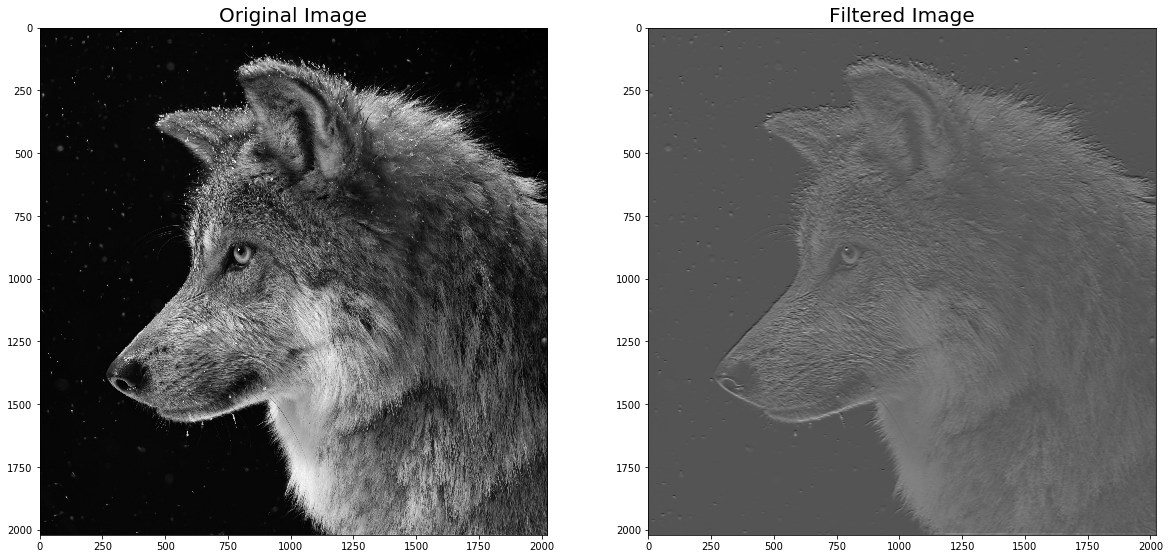

The Computational Run Time taken for filtering the image (in Seconds):  3.5691355210001348


In [123]:
# Apply the 4D kernel to the 4D Image Tensor
start_time = timeit.default_timer() 
convoluted = tf.nn.conv2d(img_4d,kernel_4d,strides=[1,1,1,1],padding='SAME')

# Convert the Result into 2D
result1=convoluted.numpy()

# Plot the results
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
plt.imshow(img, cmap='gray')
ax1.title.set_text('Original Image')
ax1.title.set_fontsize(20)
ax1 = fig.add_subplot(122)
plt.imshow(np.squeeze(result1), cmap='gray')
ax1.title.set_text('Filtered Image')
ax1.title.set_fontsize(20)
plt.savefig('Filtered Image.png')
plt.show()


# Filter Computational Time
elapsed = timeit.default_timer() - start_time
print("The Computational Run Time taken for filtering the image (in Seconds): ",elapsed)

In [96]:
# Choose the Best Convolution Method
print(signal.choose_conv_method(img, kernel, mode='same'))

fft


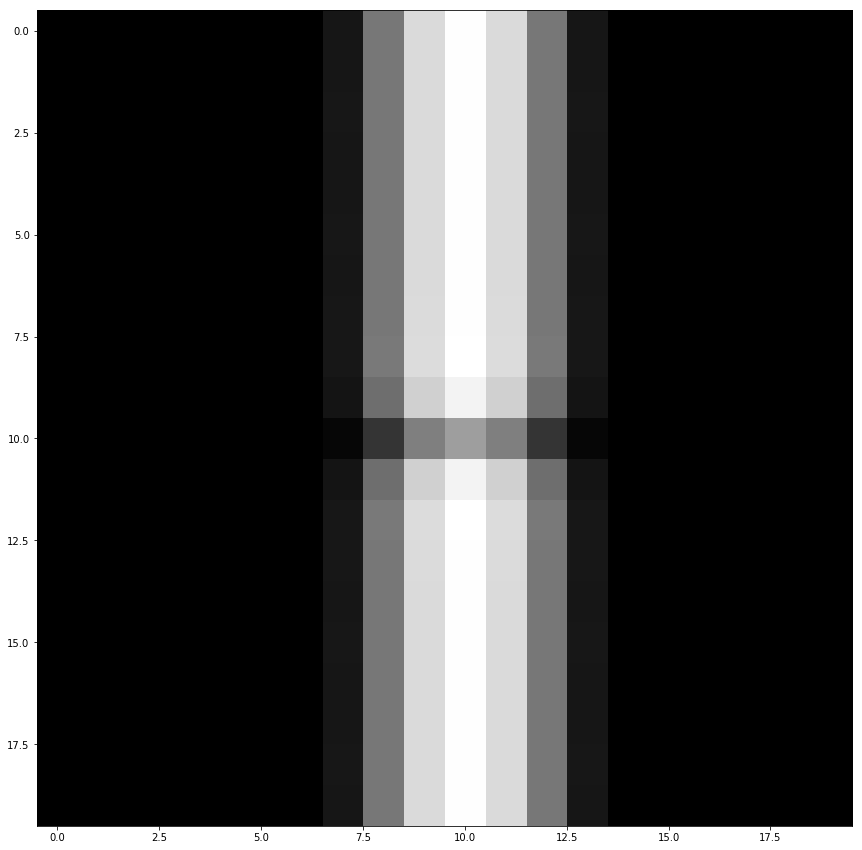

In [97]:
# Converting the kernel to frequency domain
fft_filters = np.fft.fft2(np.squeeze(kernel_4d))
fft_shift = np.fft.fftshift(fft_filters) 
mag_spectrum = np.log(np.abs(fft_shift)+1) 

# Visualize the Magnitude Spectrum of the Filter
plt.imshow(mag_spectrum, cmap='gray')

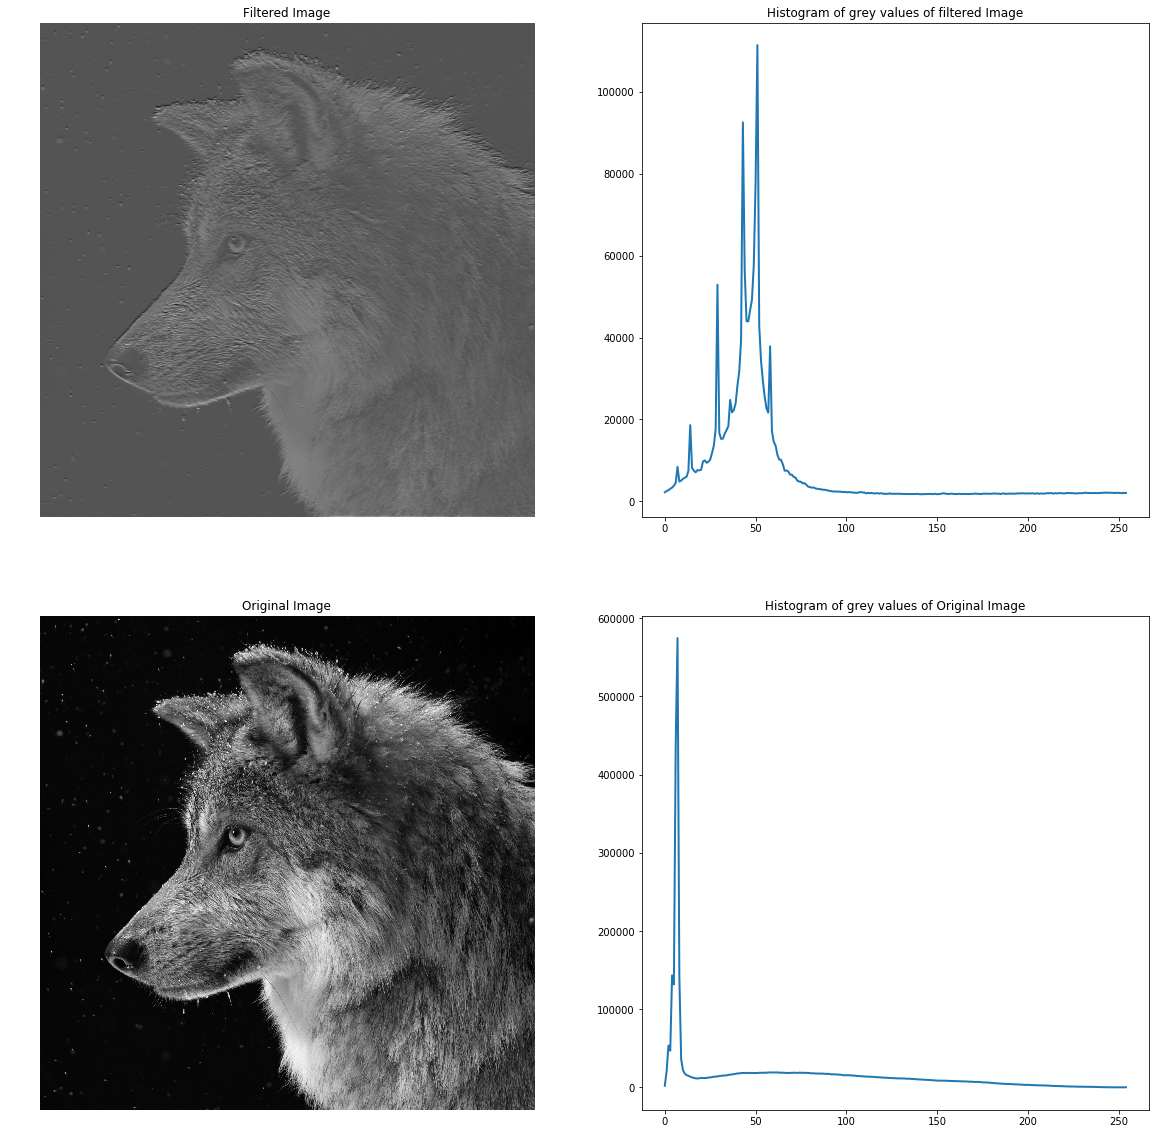

In [98]:
# Visualize the Histogram of Grey Values of the Filtered Image
hist = np.histogram(np.squeeze(result1), bins=np.arange(0, 256))
hist_img = np.histogram(img, bins=np.arange(0, 256))
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax1.imshow(np.squeeze(result1), interpolation='nearest', cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Filtered Image')
ax2 = fig.add_subplot(222)
ax2.plot(hist[1][:-1], hist[0], lw=2)
ax2.set_title('Histogram of grey values of filtered Image')
ax3 = fig.add_subplot(223)
ax3.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Original Image')
ax4 = fig.add_subplot(224)
ax4.plot(hist_img[1][:-1], hist_img[0], lw=2)
ax4.set_title('Histogram of grey values of Original Image')
plt.show()

In [0]:
# Compute the Frequenct and Impulse Response of the Filter
N = 400    # Number of coefficients.
L = 1024  # Length of frequency response.

# Pad filter with zeros.
h_padded = np.zeros(L)
h_padded[0 : N] = (np.squeeze(kernel_4d)).ravel()
q=h_padded[0:40]
q=np.ravel(q)
w, h = signal.freqz(q, a=1)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


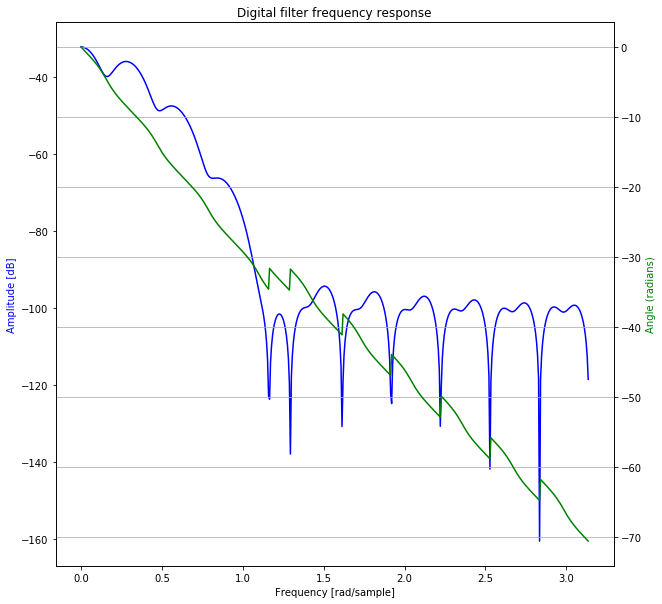

In [105]:
# Visualize the Frequency Response of the Filter
fig = plt.figure(figsize=(10,10))
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

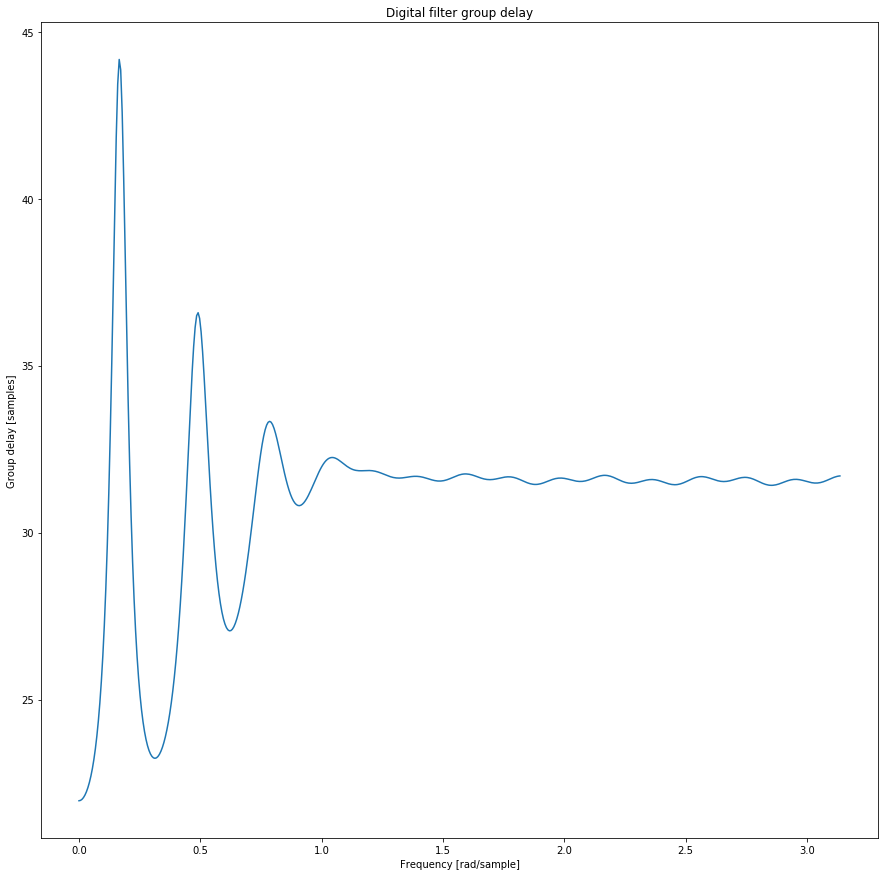

In [106]:
# Compute the Filter Group Delay
a=1
q=h_padded[0:32]
q=np.ravel(q)
w, gd = signal.group_delay((q, a))

# Visualize the Group Delay
plt.title('Digital filter group delay')
plt.plot(w, gd)
plt.ylabel('Group delay [samples]')
plt.xlabel('Frequency [rad/sample]')
plt.show()

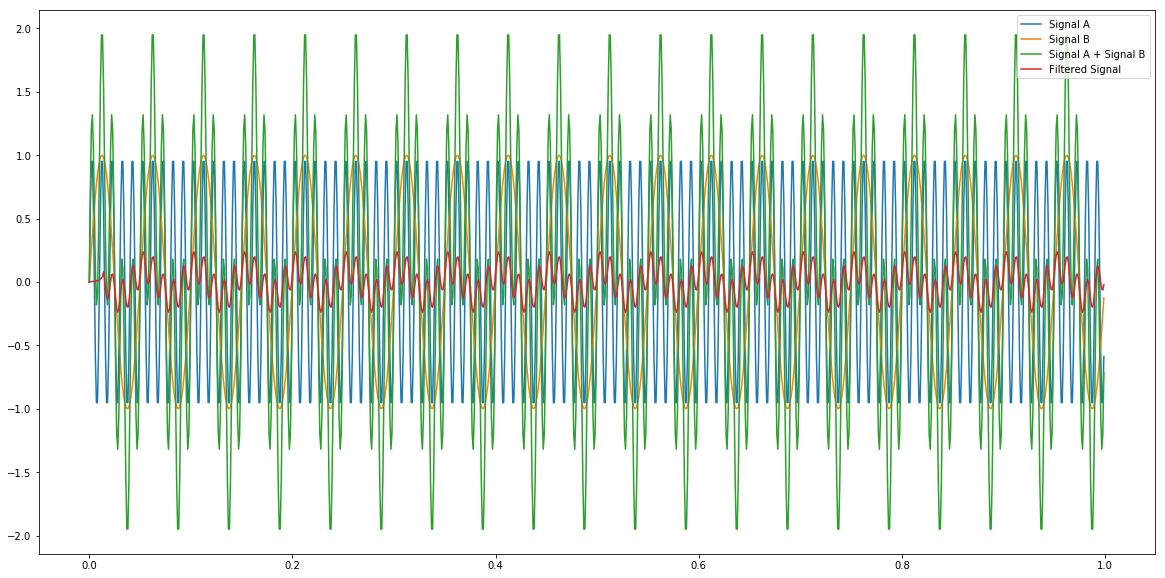

In [110]:
# Visualize Filter Effect on the summation of 2 sinusoidal signals
g=np.multiply(ys,z)
g=g[:,0]
plt.rcParams['figure.figsize'] = [20, 10]
fs = 1000  # Sampling frequency
# Generate the time vector properly
t = np.arange(1000) / fs
signala = np.sin(2*np.pi*100*t) # with frequency of 100
plt.plot(t, signala, label='Signal A')

signalb = np.sin(2*np.pi*20*t) # frequency 20
plt.plot(t, signalb, label='Signal B')

signalc = signala + signalb
plt.plot(t, signalc, label='Signal A + Signal B')
signalc=signalc.astype(np.float32)


output = np.convolve(signalc, g)
plt.plot(t, output[0:1000], label='Filtered Signal')
plt.legend()
plt.show()


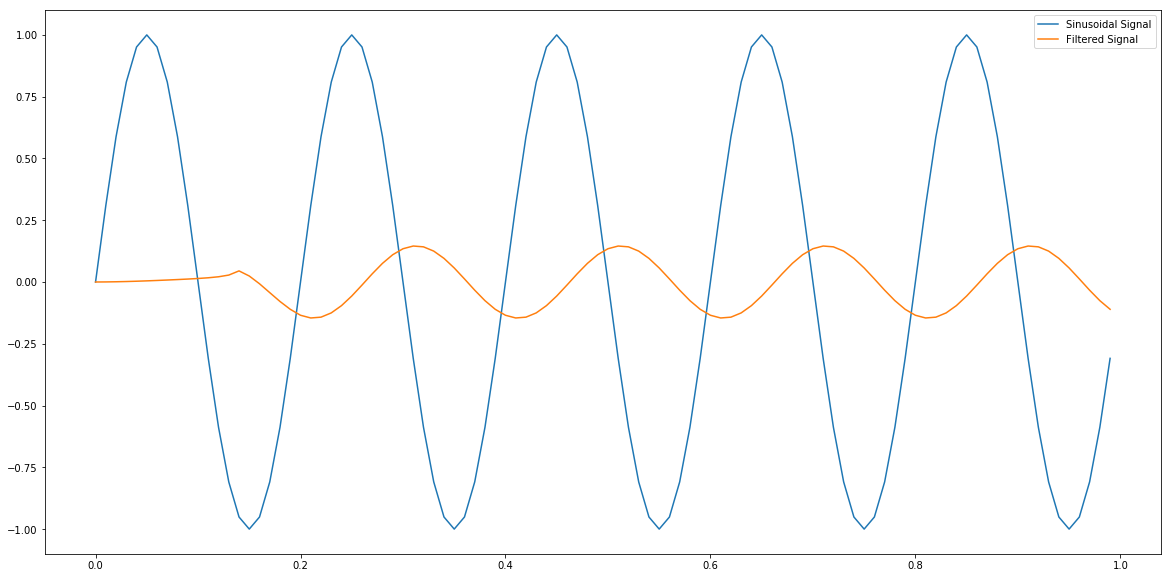

In [111]:
# Visualize Filter Effect on a sinusoidal signal
plt.rcParams['figure.figsize'] = [20, 10]
fs = 100  # Sampling frequency
# Generate the time vector properly
t = np.arange(100) / fs
signala = np.sin(2*np.pi*5*t) # with frequency of 100
plt.plot(t, signala, label='Sinusoidal Signal')
output= np.convolve(signala,g)
plt.plot(t, output[0:100], label='Filtered Signal')
plt.legend()
plt.show()

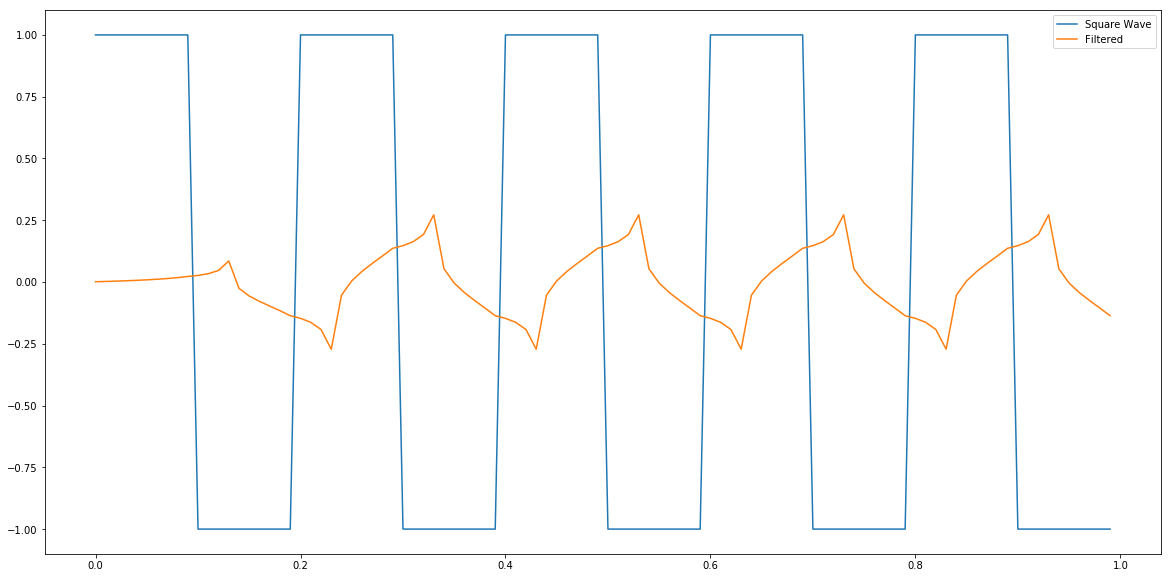

In [112]:
# Visualize Filter Effect on a square signal
plt.rcParams['figure.figsize'] = [20, 10]
fs = 100  # Sampling frequency
# Generate the time vector properly
t = np.arange(100) / fs
signala = signal.square(2*np.pi*5*t) # with frequency of 100
plt.plot(t, signala, label='Square Wave')
output= np.convolve(signala,g)
plt.plot(t, output[0:100], label='Filtered')
plt.legend()
plt.show()

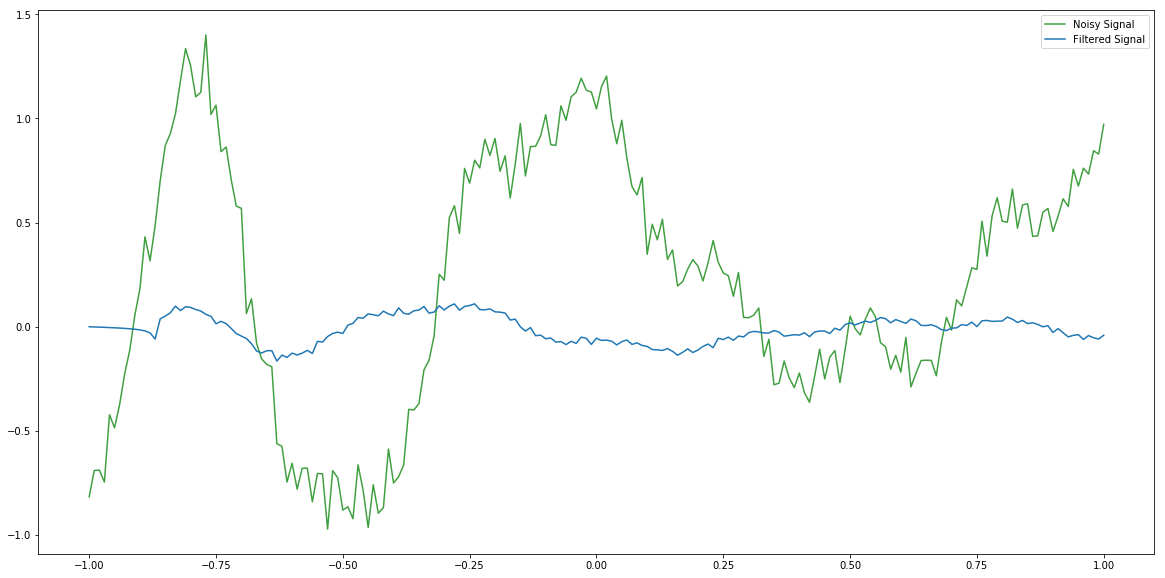

In [113]:
# Visualize Filter Effect on a noisy signal
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))
xn = x + np.random.randn(len(t)) * 0.08
output= np.convolve(xn,g)
plt.figure
plt.plot(t, xn, 'g', alpha=0.75, label='Noisy Signal')
plt.plot(t, output[0:201], label='Filtered Signal')
plt.legend()
plt.show()

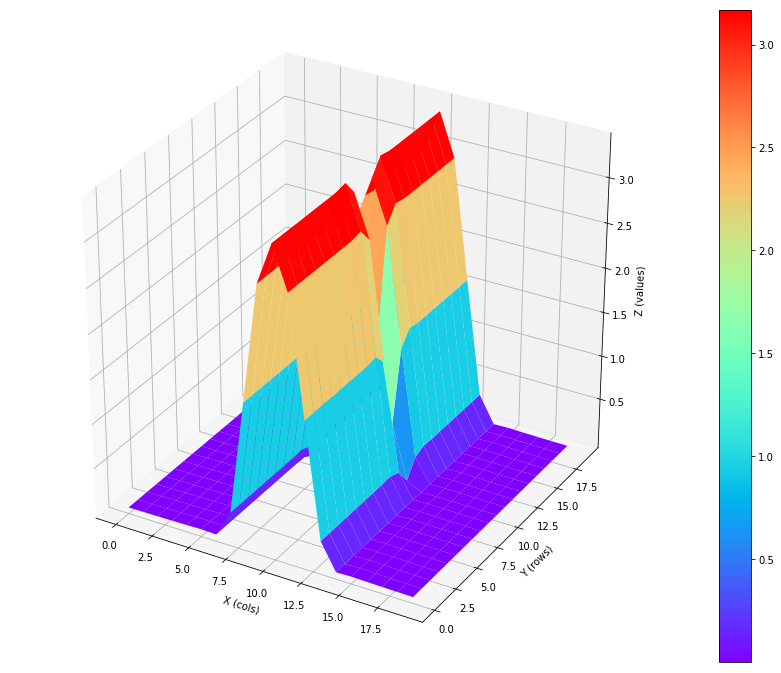

In [120]:
# Visualize the Surface of the Filter in Frequency Domain
def surface_plot (matrix, **kwargs):
    # acquire the cartesian coordinate matrices from the matrix
    # x is cols, y is rows
    (x, y) = np.meshgrid(np.arange(matrix.shape[0]), np.arange(matrix.shape[1]))
    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, matrix, **kwargs)
    return (fig, ax, surf)

m= np.squeeze(mag_spectrum)
(fig, ax, surf) = surface_plot(m, cmap=plt.cm.rainbow)
fig.colorbar(surf)

ax.set_xlabel('X (cols)')
ax.set_ylabel('Y (rows)')
ax.set_zlabel('Z (values)')

plt.show()

In [121]:
# Calculate the PSNR Value
def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d=psnr(img,np.squeeze(result1))
print("The PSNR Value of the Filtered Image is (in dB):",d)

The PSNR Value of the Filtered Image is (in dB): -6.8140930750971265


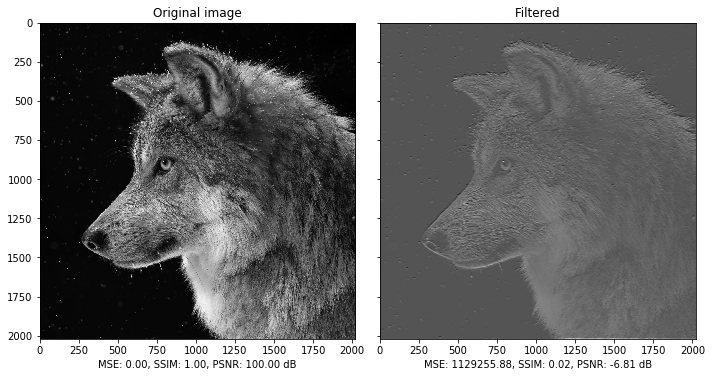

In [122]:
# Evaluate the image based on MSE, SSIM and PSNR values
rows, cols = img.shape
def mse(x, y):
    return np.linalg.norm(x - y)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()
mse_none = mse(img, img)
ssim_none = ssim(img, img)
psnr_none=psnr(img,img)
mse_noise = mse(img, np.squeeze(result1))
ssim_noise = ssim(img, np.squeeze(result1))
psnr_noise=psnr(img,np.squeeze(result1))
label = 'MSE: {:.2f}, SSIM: {:.2f}, PSNR: {:.2f} dB'
ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_xlabel(label.format(mse_none, ssim_none, psnr_none))
ax[0].set_title('Original image')
ax[1].imshow(np.squeeze(result1), cmap=plt.cm.gray)
ax[1].set_xlabel(label.format(mse_noise, ssim_noise, psnr_noise))
ax[1].set_title('Filtered')
plt.tight_layout()
plt.show()